# Data Augmentation: Examples and Performance Comparison

## Introduction

Data augmentation is a technique used to artificially increase the size and diversity of a dataset by applying transformations to the existing data. This helps improve model generalization and reduces overfitting, especially when the dataset is small or lacks variability.

In this notebook, we will:
1. Apply data augmentation techniques to the ASCAD dataset.
2. Train models with and without augmented data.
3. Compare their performance using metrics such as training loss, validation loss, and accuracy.

In [1]:
# Import necessary libraries
from ASCAD_train_models import load_ascad

# Load the ASCAD dataset
ascad_database = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_databases/ASCAD.h5"
(X_profiling, Y_profiling), (X_attack, Y_attack) = load_ascad(ascad_database)

# Display the shape of the dataset
print(f"Profiling traces shape: {X_profiling.shape}")
print(f"Profiling labels shape: {Y_profiling.shape}")
print(f"Attack traces shape: {X_attack.shape}")
print(f"Attack labels shape: {Y_attack.shape}")

Profiling traces shape: (50000, 700)
Profiling labels shape: (50000,)
Attack traces shape: (10000, 700)
Attack labels shape: (10000,)


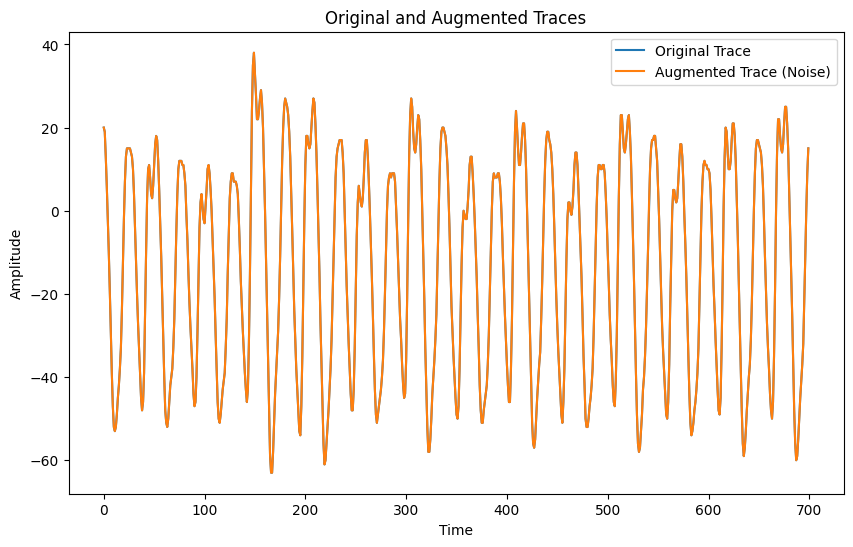

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Augmentation: Add Gaussian noise
def add_noise(trace, noise_level=0.01):
    noise = np.random.normal(0, noise_level, trace.shape)
    return trace + noise

# Augmentation: Scale the trace
def scale_trace(trace, scale_factor=1.2):
    return trace * scale_factor

# Augmentation: Shift the trace
def shift_trace(trace, shift=5):
    return np.roll(trace, shift)

# Apply augmentations to the profiling dataset
X_profiling_augmented = np.array([add_noise(trace) for trace in X_profiling])

# Plot original and augmented traces
plt.figure(figsize=(10, 6))
plt.plot(X_profiling[0], label="Original Trace")
plt.plot(X_profiling_augmented[0], label="Augmented Trace (Noise)")
plt.title("Original and Augmented Traces")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [3]:
from ASCAD_train_models import cnn_best, train_model

# Train the model without augmentation
model_without_augmentation = cnn_best(input_dim=len(X_profiling[0]))
history_without_augmentation = train_model(
    X_profiling, Y_profiling, model_without_augmentation,
    save_file_name="model_without_augmentation.keras",
    epochs=5, batch_size=200, validation_split=0.2
)

# Train the model with augmentation
model_with_augmentation = cnn_best(input_dim=len(X_profiling_augmented[0]))
history_with_augmentation = train_model(
    X_profiling_augmented, Y_profiling, model_with_augmentation,
    save_file_name="model_with_augmentation.keras",
    epochs=5, batch_size=200, validation_split=0.2
)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.0033 - loss: 5.6768 - val_accuracy: 0.0044 - val_loss: 5.5453
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.0044 - loss: 5.5551 - val_accuracy: 0.0046 - val_loss: 5.5452
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.0041 - loss: 5.5493 - val_accuracy: 0.0039 - val_loss: 5.5452
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.0036 - loss: 5.5476 - val_accuracy: 0.0046 - val_loss: 5.5453
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.0041 - loss: 5.5468 - val_accuracy: 0.0046 - val_loss: 5.5451
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.0042 - loss: 5.6562 - val_accuracy: 0.0033 - val_loss: 5.5453
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.0030 - loss: 5.5543 - val_accuracy: 0.0026 - val_loss: 5.5453
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.0037 - loss: 5.5494 - val_accuracy: 0.

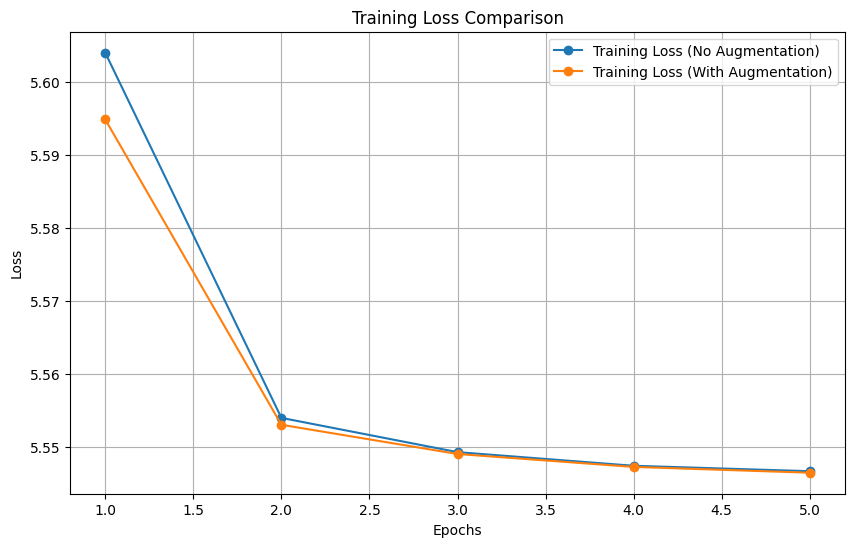

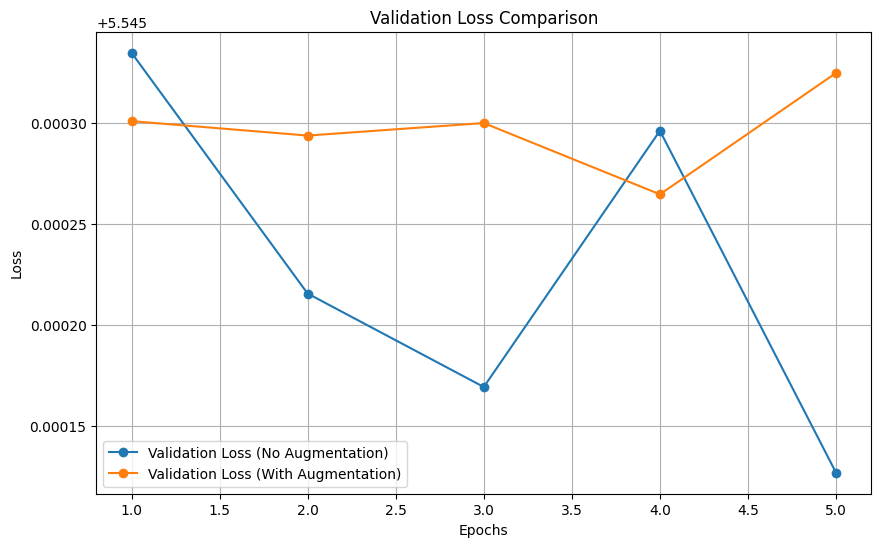

In [4]:
# Import necessary libraries
import pickle

# Load history files
with open("model_without_augmentation_history.pkl", "rb") as f:
    history_without_augmentation = pickle.load(f)

with open("model_with_augmentation_history.pkl", "rb") as f:
    history_with_augmentation = pickle.load(f)

# Extract metrics
epochs = range(1, len(history_without_augmentation['loss']) + 1)
loss_without_augmentation = history_without_augmentation['loss']
val_loss_without_augmentation = history_without_augmentation['val_loss']
loss_with_augmentation = history_with_augmentation['loss']
val_loss_with_augmentation = history_with_augmentation['val_loss']

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_without_augmentation, label="Training Loss (No Augmentation)", marker='o')
plt.plot(epochs, loss_with_augmentation, label="Training Loss (With Augmentation)", marker='o')
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_loss_without_augmentation, label="Validation Loss (No Augmentation)", marker='o')
plt.plot(epochs, val_loss_with_augmentation, label="Validation Loss (With Augmentation)", marker='o')
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()